### Airlines dataset 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the  Data
data= pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.shape

(96, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
quarter=['year','month']
n=data['Month'][0]

In [6]:
data['quarter']=0

In [7]:
data

,Month,Passengers,quarter
0,1995-01-01,112,0
1,1995-02-01,118,0
2,1995-03-01,132,0
3,1995-04-01,129,0
4,1995-05-01,121,0
...,...,...,...
91,2002-08-01,405,0
92,2002-09-01,355,0
93,2002-10-01,306,0
94,2002-11-01,271,0


In [8]:
df=pd.DataFrame(pd.get_dummies(data['quarter']))

In [9]:
df

,0
0,1
1,1
2,1
3,1
4,1
...,...
91,1
92,1
93,1
94,1


In [10]:
df1=pd.concat((data,df),axis=1)
t= np.arange(1,97)
df1['t']=t
df1['t_square']=df1['t']*df1['t']

In [11]:
log_Passengers=np.log(df1['Passengers'])
df1['log_Passengers']=log_Passengers

In [12]:
df1

,Month,Passengers,quarter,0,t,t_square,log_Passengers
0,1995-01-01,112,0,1,1,1,4.718499
1,1995-02-01,118,0,1,2,4,4.770685
2,1995-03-01,132,0,1,3,9,4.882802
3,1995-04-01,129,0,1,4,16,4.859812
4,1995-05-01,121,0,1,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,92,8464,6.003887
92,2002-09-01,355,0,1,93,8649,5.872118
93,2002-10-01,306,0,1,94,8836,5.723585
94,2002-11-01,271,0,1,95,9025,5.602119


<AxesSubplot:>

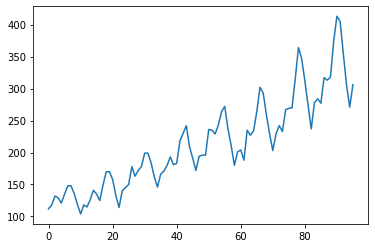

In [13]:
train= df1.head(38)
test=df1.tail(4)
df1.Passengers.plot()

### Build Model

In [14]:
import statsmodels.formula.api as smf

#linear model
linear= smf.ols('Passengers~t',data=data).fit()
predlinear=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselinear=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlinear))**2))
rmselinear

11.605104901428831

In [15]:
#quadratic model
quadratic=smf.ols('Passengers~t+t_square',data=train).fit()
predquadratic=pd.Series(quadratic.predict(pd.DataFrame(test[['t','t_square']])))
rmsequadratic=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquadratic))**2))
rmsequadratic

79.64782713419817

In [16]:
#exponential model
exponential=smf.ols('log_Passengers~t',data=train).fit()
predexponential=pd.Series(exponential.predict(pd.DataFrame(test['t'])))
predexponential
rmseexponential=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexponential)))**2))
rmseexponential

44.60120840659422

In [17]:
#additive seasonality
additive= smf.ols('Passengers~ quarter',data=train).fit()
predadditive=pd.Series(additive.predict(pd.DataFrame(test[['quarter']])))
predadditive
rmseadditive=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadditive))**2))
rmseadditive

165.15098648797144

In [18]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+quarter',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','quarter']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

48.0060000406954

In [19]:
#additive seasonality with quadratic trend
addquadratic=smf.ols('Passengers~t+t_square+quarter',data=train).fit()
predaddquadratic=pd.Series(addquadratic.predict(pd.DataFrame(test[['t','t_square','quarter']])))
rmseaddquadratic=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquadratic))**2))
rmseaddquadratic

79.64782713419702

In [20]:
#multiplicative seasonality
mulseason=smf.ols('log_Passengers~quarter',data=train).fit()
predmulseason= pd.Series(mulseason.predict(pd.DataFrame(test[['quarter']])))
rmsemulseason= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmulseason)))**2))
rmsemulseason


167.19716630359034

In [21]:
#multiplicative seasonality with linear trend
mullinear= smf.ols('log_Passengers~t+quarter',data=train).fit()
predmullinear= pd.Series(mullinear.predict(pd.DataFrame(test[['t','quarter']])))
rmsemulinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullinear)))**2))
rmsemulinear

44.60120840659422

In [22]:
#multiplicative seasonality with quadratic trend
mul_quadratic= smf.ols('log_Passengers~t+t_square+quarter',data=train).fit()
pred_mul_quadratic= pd.Series(mul_quadratic.predict(test[['t','t_square','quarter']]))
rmse_mul_quadratic=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quadratic)))**2))
rmse_mul_quadratic

325.45609840599167

In [23]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quadratic','rmseadditive','rmseaddlinear','rmseaddquadratic','rmseexponential','rmselinear','rmsemulseason','rmsemulinear','rmsequadratic']),'Values':pd.Series([rmse_mul_quadratic,rmseadditive,rmseaddlinear,rmseaddquadratic,rmseexponential,rmselinear,rmsemulseason,rmsemulinear,rmsequadratic])}
data

{'Model': 0    rmse_mul_quadratic
 1          rmseadditive
 2         rmseaddlinear
 3      rmseaddquadratic
 4       rmseexponential
 5            rmselinear
 6         rmsemulseason
 7          rmsemulinear
 8         rmsequadratic
 dtype: object,
 'Values': 0    325.456098
 1    165.150986
 2     48.006000
 3     79.647827
 4     44.601208
 5     11.605105
 6    167.197166
 7     44.601208
 8     79.647827
 dtype: float64}

In [24]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quadratic,325.456098
1,rmseadditive,165.150986
2,rmseaddlinear,48.006000
3,rmseaddquadratic,79.647827
4,rmseexponential,44.601208
5,rmselinear,11.605105
6,rmsemulseason,167.197166
7,rmsemulinear,44.601208
8,rmsequadratic,79.647827


### Airlines Dataset rmse value for all model is obtained in that linear model is best because it has lower rmse value. Hence it is good to use for forecasting model.

### Cocacola dataset

In [25]:
#importing libraries
import pandas as pd
import numpy as np

In [26]:
#reading the data
data1= pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [27]:
#for shape
data1.shape

(42, 2)

In [28]:
quarter=['Q1','Q2','Q3','Q4']
n=data1['Quarter'][0]
n[0:2]

'Q1'

In [29]:
data1['quarter']=0

In [30]:
data1

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0
5,Q2_87,2104.411995,0
6,Q3_87,2014.362999,0
7,Q4_87,1991.746998,0
8,Q1_88,1869.049999,0
9,Q2_88,2313.631996,0


In [31]:
for i in range(42):
    n=data1['Quarter'][i]
    data1['quarter'][i]=n[0:2]

<ipython-input-31-9377b8040937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['quarter'][i]=n[0:2]
C:\Users\pabba\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [32]:
df=pd.DataFrame(pd.get_dummies(data1['quarter']))

In [33]:
data1

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [34]:
df1=pd.concat((data1,df),axis=1)
t= np.arange(1,43)
df1['t']=t
df1['t_square']=df1['t']*df1['t']

In [35]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [36]:
log_Sales=np.log(df1['Sales'])
df1['log_Sales']=log_Sales

In [37]:
df1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:>

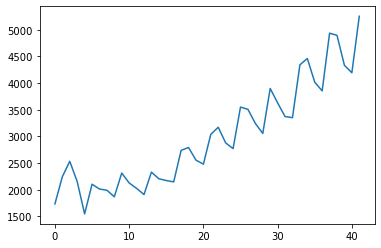

In [38]:
df1.Sales.plot()

<AxesSubplot:>

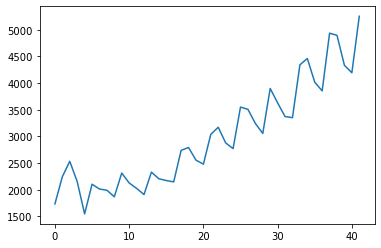

In [39]:
train= df1.head(38)
test=df1.tail(4)
df1.Sales.plot()

### Build a model

In [40]:
import statsmodels.formula.api as smf

#linear model
linear= smf.ols('Sales~t',data=data1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

282.11213941553274

In [41]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.56183518315095

In [42]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.24797310672346

In [43]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547283

In [44]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


464.98290239822427

In [45]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719352977

In [46]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779709

In [47]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.5243904982721

In [48]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187971785

In [49]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0     581.845719
 1    1860.023815
 2     464.982902
 3     301.738007
 4     466.247973
 5     282.112139
 6    1963.389640
 7     225.524390
 8     475.561835
 dtype: float64}

In [50]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,282.112139
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmsequad,475.561835


### CocaCola Dataset rmse value for all model is obtained in that multiplicative seasonality with linear trend model is best because it has lower rmse value. Hence it is good to use for forecasting model.¶